# Lab 8: Normal Distribution and Variance of Sample Means

Welcome to Lab 8!

In today's lab, we will learn about [the variance of sample means](https://www.inferentialthinking.com/chapters/14/5/variability-of-the-sample-mean.html) as well as [the normal distribution](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

In [4]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore', FutureWarning)



# 1. Normal Distributions

When we visualize the distribution of a sample, we are often interested in the mean and the standard deviation of the sample (for the rest of this lab, we will abbreviate “standard deviation” as “SD”). These two summary statistics can give us a bird’s eye view of the distribution - by letting us know where the distribution sits on the number line and how spread out it is, respectively. 

We want to check if the data is linearly related, so we should look at the data.

**Question 1.1.** The next cell loads the table `births` from lecture, which is a large random sample of US births and includes information about mother-child pairs. 

Plot the distribution of mother’s ages from the table. Don’t change the last line, which will plot the mean of the sample on the distribution itself.

<!--
BEGIN QUESTION
name: q1_1
-->

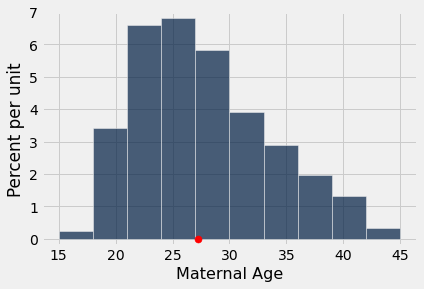

In [2]:
births = Table.read_table('baby.csv')

# Add your plot code here
...

# Do not change these lines
plt.ylim(-.002, .07)
plt.scatter(np.mean(births.column("Maternal Age")), 0, color='red', s=50
            , zorder=4);

From the plot above, we can see that the mean is the center of gravity or balance point of the distribution. If you cut the distribution out of cardboard, and then placed your finger at the mean, the distribution would perfectly balance on your finger. Since the distribution above is right skewed (which means it has a long right tail), we know that the mean of the distribution is larger than the median, which is the “halfway” point of the data. Conversely, if the distribution had been left skewed, we know the mean would be smaller than the median.

**Question 1.2.** Run the following cell to compare the mean (red) and median (green) of the distribution of mothers ages.

<!--
BEGIN QUESTION
name: q1_2
-->

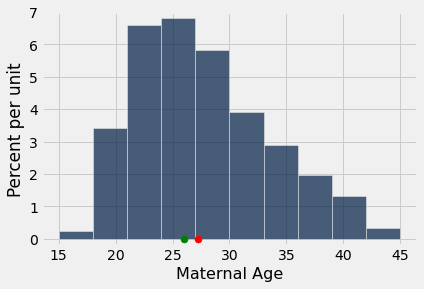

In [3]:
#  Do not change or delete any of these lines of code

births.hist("Maternal Age")
plt.ylim(-.002, .07)
plt.scatter(np.mean(births.column("Maternal Age")), 0, color='red', s=50, zorder=4);
plt.scatter(np.median(births.column("Maternal Age")), 0, color='green', s=50, zorder =5);

We are also interested in the standard deviation of mother’s ages. The SD gives us a sense of how variable mothers' ages are around the average mothers' age. If the SD is large, then the mothers' heights should spread over a large range from the mean. If the SD is small, then the mothers' heights should be tightly clustered around the average mother height. 

**The SD of an array is defined as the root mean square of deviations (differences) from average**.

Fun fact! σ (Greek letter sigma) is used to represent the SD and  μ (Greek letter mu) is used for the mean.

**Question 1.3.** Run the cell below to see the width of one SD (blue) from the sample mean (red) plotted on the histogram of maternal ages.

<!--
BEGIN QUESTION
name: q1_3
-->

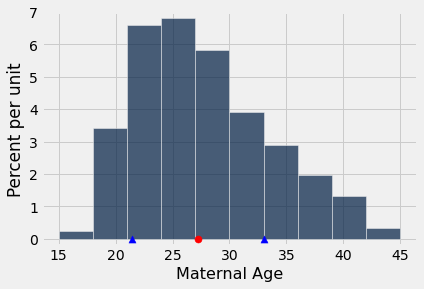

In [4]:
#  calculate the mean and standard devuiation of ages
age_mean = ...
age_sd = ...

#  Do not change or delete any of the following lines of code
births.hist("Maternal Age")
plt.ylim(-.002, .07)
plt.scatter(age_mean, 0, color='red', s=50, zorder = 3);
plt.scatter(age_mean+age_sd, 0, marker='^', color='blue', s=50, zorder = 4);
plt.scatter(age_mean-age_sd, 0, marker='^', color='blue', s=50, zorder = 5);

In this histogram, the standard deviation is not easy to identify just by looking at the graph.

However, the distributions of some variables allow us to easily spot the standard deviation on the plot. For example, if a sample follows a *normal distribution*, the standard deviation is easily spotted at the point of inflection (the point where the curve begins to change the direction of its curvature) of the distribution. 

**Question 1.4.** Fill in the following code to examine the distribution of maternal heights, which is roughly normally distributed. We’ll plot the standard deviation on the histogram, as before - notice where one standard deviation (blue) away from the mean (red) falls on the plot.

<!--
BEGIN QUESTION
name: q1_4
-->

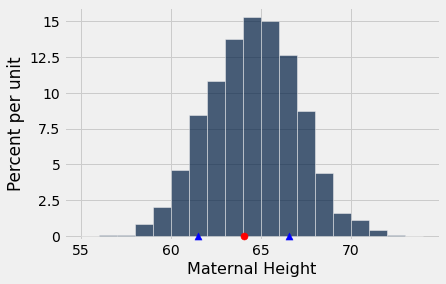

In [5]:
#  calculate the mean and standard devuiation of heights
height_mean = ...
height_sd = ...

#  Do not change or delete any of the following lines of code
births.hist("Maternal Height", bins=np.arange(55,75,1))
plt.ylim(-0.003, 0.16)
plt.scatter((height_mean), 0, color='red', s=50, zorder = 3);
plt.scatter(height_mean+height_sd, 0, marker='^', color='blue', s=50, zorder = 3);
plt.scatter(height_mean-height_sd, 0, marker='^', color='blue', s=50, zorder = 3);

We don’t always know how a variable will be distributed, and making assumptions about whether or not a variable will follow a normal distribution is dangerous. However, the Central Limit Theorem defines one distribution that always follows a normal distribution. The distribution of the *sums* and *means* of many large random samples drawn with replacement from a single distribution (regardless of the distribution’s original shape) will be normally distributed. Remember that the Central Limit Theorem refers to the distribution of a *statistic* calculated from a distribution, not the distribution of the original sample or population. If this is confusing, ask a TA!

The next section will explore distributions of sample means, and you will see how the standard deviation of these distributions depends on sample sizes.

# 2. Variability of the Sample Mean

By the [Central Limit Theorem](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html), the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an **unbiased estimate** of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the [variability of the sample mean](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco in 2014. The mean salary reported by the city government was about $75,463.92.

*Note: If you get stuck on any part of this lab, please refer to [chapter 14 of the textbook](https://www.inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html).*


Read in the table 

1. Read in the file 'Georgia_Salaries_2021.csv' and name the table 'georgia_salaries'
2. Display all of the column names in 'Georgia_Salaries_2021.csv'
2. Create an array named salaries that contains all of the values in the column 'SALARY'
4. Find the mean of salaries.

In [9]:
# insert your code here
georgia_salaries = Table.read_table('Georgia_Salaries_2021.csv')

...
salaries = ...
...


ID,TITLE,SALARY,TRAVEL,ORGANIZATION
1,GRADES 9-12 TEACHER,50202.9,0,EFFINGHAM COUNTY BOARD OF EDUCATION
2,GRADE 4 TEACHER,67604,0,EFFINGHAM COUNTY BOARD OF EDUCATION
3,SCHOOL FOOD SERVICE WORKER,20924,0,EFFINGHAM COUNTY BOARD OF EDUCATION
4,SUBSTITUTE TEACHER,1218.75,0,EFFINGHAM COUNTY BOARD OF EDUCATION
5,GRADE 6 TEACHER,57205.7,0,EFFINGHAM COUNTY BOARD OF EDUCATION
6,CROSSROADS,45911.7,0,EFFINGHAM COUNTY BOARD OF EDUCATION
7,SUBSTITUTE TEACHER,925,0,EFFINGHAM COUNTY BOARD OF EDUCATION
8,GRADES 9-12 TEACHER,65641.8,0,EFFINGHAM COUNTY BOARD OF EDUCATION
9,GRADE 8 TEACHER,79482,0,EFFINGHAM COUNTY BOARD OF EDUCATION
10,GRADES 9-12 TEACHER,55729.1,0,EFFINGHAM COUNTY BOARD OF EDUCATION


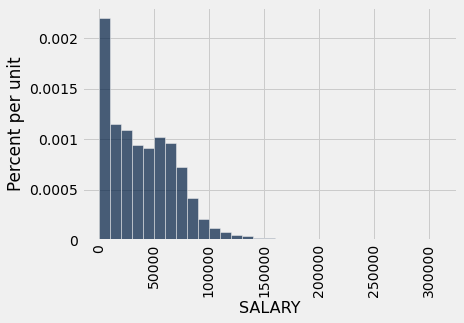

In [17]:

salary_mean = ...
print('Mean salary of State of Georgia employees in 2022: ', round(salary_mean,2))

#  Do not change or delete any of the following lines of code
georgia_salaries.hist('SALARY', bins=np.arange(0, 300000+10000*2, 10000))
# georgia_salaries.hist('SALARY',bins=np.arange(0, 300000+10000*2, 10000))

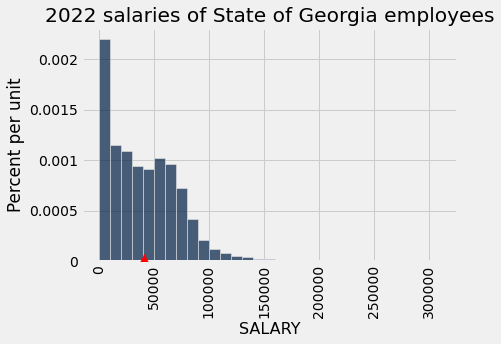

In [18]:
#  do not change or delete the following lines of code

georgia_salaries.hist('SALARY', bins=np.arange(0, 300000+10000*2, 10000))
plt.scatter(salary_mean, 0, marker='^', color='red', s=200, zorder = 3);
plt.title('2022 salaries of State of Georgia employees');

Clearly, the population does not follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples *with replacement* and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

**Question 2.1.** The function `one_sample_mean` below takes 3 arguments: `table` (the name of a table), `label` (the label of the column containing the variable), and `sample size`(the number of employees in the sample). It samples with replacement from the table and
returns the mean of the `label` column of the sample. Do not Delete or edit the cell below.

<!--
BEGIN QUESTION
name: q2_1
-->

In [22]:
# DO NOT DELETE OR EDIT THIS CELL

sample_size = 30

def one_sample_mean(table, label, sample_size):
    new_sample = table.sample(sample_size, with_replacement = True)
    new_sample_mean = np.mean(new_sample.column(label))
    return new_sample_mean
    

sample_average = round(one_sample_mean(georgia_salaries, 'SALARY', sample_size),2)
print('The average of',sample_size, 'randomly selected salaries is $', sample_average)

The average of 30 randomly selected salaries is $ 28883.72




The function `simulate_sample_mean` samples with replacement from the table and calculates the mean of each sample.  The function '  displays an empirical histogram of the sample means.



In [20]:
# DO NOT DELETE OR EDIT THIS CELL

"""Empirical distribution of random sample means"""
repetitions = 100

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()
#     plt.clf()

    for i in np.arange(repetitions):
        new_sample_mean = one_sample_mean(table, label, sample_size)
        means = np.append(means, new_sample_mean)
    
    xaxis_lo = min(means)
    xaxis_lo = np.trunc(xaxis_lo/1000)*1000
    # print('xaxis_lo',xaxis_lo)

    xaxis_hi = max(means)
    xaxis_hi = np.ceil(xaxis_hi/1000)*1000
    # print('xaxis_hi = ',xaxis_hi)
    print("Sample size: ",round(sample_size))
    print("Population mean:", round(np.mean(table.column(label))))
    print("Min of sample means", round(min(means)))
    print("Average of sample means: ", round(np.mean(means)))
    print("Max of sample means", round(max(means)))
    print("Population SD:", round(np.std(table.column(label))))
    print("SD of sample means:", round(stats.tstd(means)))

    return means,xaxis_lo,xaxis_hi

def plot_sample_means(means,sample_size,xaxis_lo,xaxis_hi):
    n, edges,patches = plt.hist(means, density = True, bins=np.arange(xaxis_lo,xaxis_hi,2500))
    plt.xlim(xaxis_lo, xaxis_hi)
    plt.title('Sample Size ' + str(sample_size))
    plt.text(xaxis_lo + 1000, max(n) - 0.00001, r'$\overline{x}=$' + str(round(np.mean(means))))
    plt.text(xaxis_lo + 1000, max(n) - 0.00003,r'$S=$' + str(round(stats.tstd(means))))
    plt.show()
    return 

def prop_in_range(values,range):
    
    return
    



**Question 2.2.** Use the function `simulate_sample_mean`. Set the sample size to 30, and the number of repetitions to 100. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

Sample size:  30
Population mean: 40883
Min of sample means 28460
Average of sample means:  41088
Max of sample means 71273
Population SD: 37652
SD of sample means: 6957


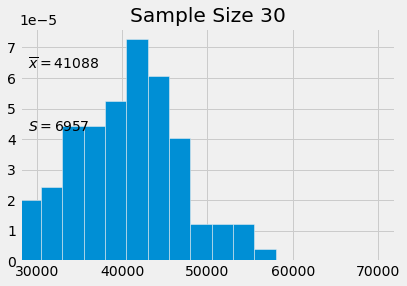

72000.0

In [23]:
sample_size = ...
repetitions = ...
means, xlo, xhi = simulate_sample_mean(..., ..., ..., ...)

#  do not change or delete the following lines of code

plot_sample_means(means, sample_size, xlo, xhi)
xhi

**Question 2.2.1** Use the function `simulate_sample_mean`. Set the sample size to 100, and the number of repetitions to 100. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

Sample size:  100
Population mean: 40883
Min of sample means 32565
Average of sample means:  40844
Max of sample means 51235
Population SD: 37652
SD of sample means: 3530


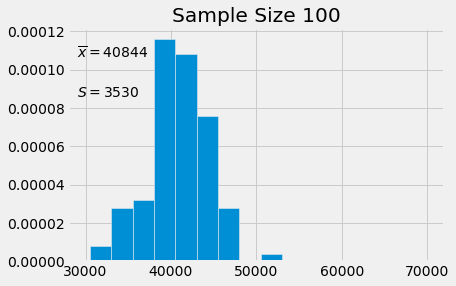

In [24]:
sample_size = ...
means, _lo, _hi = simulate_sample_mean(..., ..., ... ,...)
plot_sample_means(means, sample_size, xlo, xhi)

Verify with your neighbor or TA that you've implemented the function above correctly. If you haven't implemented it correctly, the rest of the lab won't work properly, so this step is crucial.

 In the following cell, we will create a sample of size 100 from `salaries` and graph it using our new `simulate_sample_mean` function.
 
 *Hint: You should see a distribution similar to something we've been talking about. If not, check your function*

Sample size:  200
Population mean: 40883
Min of sample means 33225
Average of sample means:  41350
Max of sample means 72648
Population SD: 37652
SD of sample means: 4255


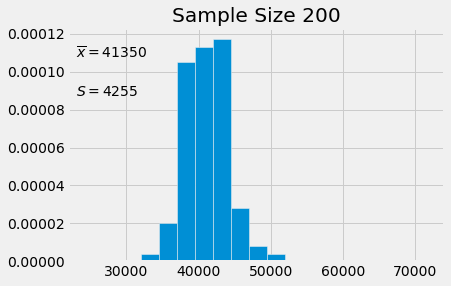

In [13]:
#  do not change or delete the following lines of code

sample_size = 200

means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size,repetitions)
plot_sample_means(means, sample_size, xlo, xhi)

**Question 2.3.** Simulate two sample means, one for a sample of 400 salaries and one for a sample of 625 salaries. In each case, perform 10,000 repetitions. Don't worry about the `plots.xlim` line – it just makes sure that all of the plots have the same x-axis. 

<!--
BEGIN QUESTION
name: q2_3
-->

Sample size:  400
Population mean: 40883
Min of sample means 34745
Average of sample means:  40864
Max of sample means 59175
Population SD: 37652
SD of sample means: 1906


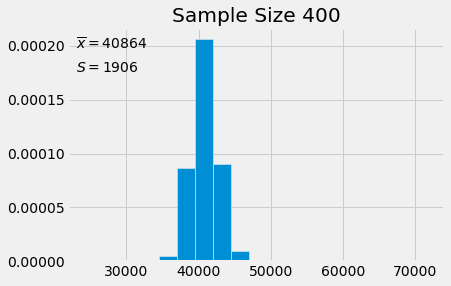

Sample size:  625
Population mean: 40883
Min of sample means 35838
Average of sample means:  40888
Max of sample means 54443
Population SD: 37652
SD of sample means: 1505


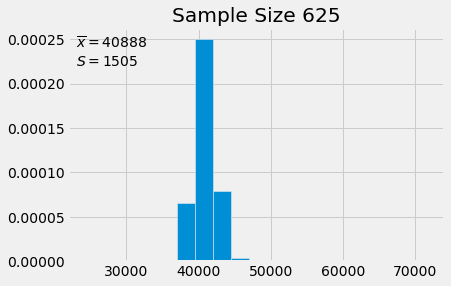

In [14]:
sample_size = ...
repetitions = ...

means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size,repetitions)
plot_sample_means(means, sample_size, xlo, xhi)


sample_size = 400
means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size,repetitions)
plot_sample_means(means, sample_size, xlo, xhi)


**Question 2.4.** Assign `q2_4` to an array of numbers corresponding to true statement(s) about the plots from 2.3.

1. We see the Central Limit Theorem (CLT) in action because the distributions of the sample means are bell-shaped.
2. We see the Law of Averages in action because the distributions of the sample means look like the distribution of the population.
3. One of the conditions for CLT is that we have to draw a small random sample with replacement from the population.
4. One of the conditions for CLT is that we have to draw a large random sample with replacement from the population.
5. One of the conditions for CLT is that the population must be normally distributed.
6. Both plots in 2.3 are roughly centered around the population mean.
7. Both plots in 2.3 are roughly centered around the mean of a particular sample.
8. The distribution of sample means for sample size 625 has less variability than the distribution of sample means for sample size 400.
9. The distribution of sample means for sample size 625 has more variability than the distribution of sample means for sample size 400.

<!--
BEGIN QUESTION
name: q2_4
-->

In [15]:
q2_4 = ...

Below, we'll look at what happens when we take an increasing number of resamples of a fixed sample size. Notice what number in the code changes, and what stays the same. How does the distribution of the resampled means change?

Sample size:  100
Population mean: 40883
Min of sample means 31701
Average of sample means:  40902
Max of sample means 53825
Population SD: 37652
SD of sample means: 3479


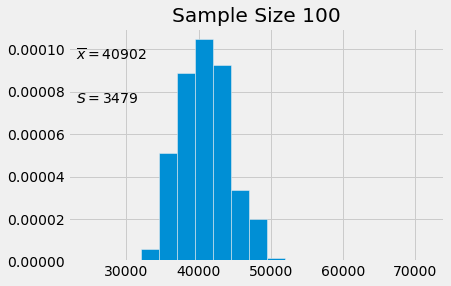

In [16]:
# do not chage or delete the following lines of code
sample_size = 100
num_reps = 500
means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size, num_reps)
plot_sample_means(means, sample_size, xlo, xhi)
# plt.xlim(30000, 100000);

Sample size:  100
Population mean: 40883
Min of sample means 30893
Average of sample means:  41163
Max of sample means 76064
Population SD: 37652
SD of sample means: 3770


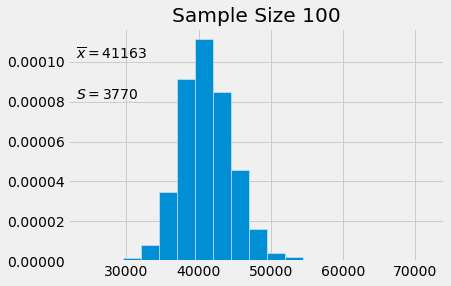

In [17]:
# Do not change or delete the following lines of code
num_reps = 1000
means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size, num_reps)
plot_sample_means(means, sample_size, xlo, xhi)
# plt.xlim(50000, 100000);


Sample size:  100
Population mean: 40883
Min of sample means 28890
Average of sample means:  40844
Max of sample means 108625
Population SD: 37652
SD of sample means: 3700


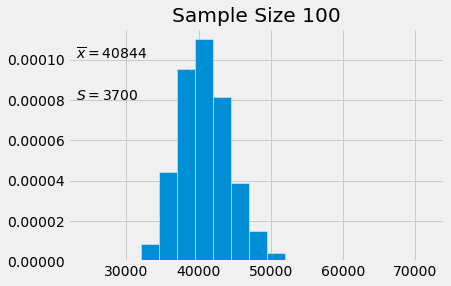

In [18]:
num_reps = 5000
means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size, num_reps)
plot_sample_means(means, sample_size, xlo, xhi)
# plt.xlim(50000, 100000);

Sample size:  100
Population mean: 40883
Min of sample means 28496
Average of sample means:  40963
Max of sample means 113856
Population SD: 37652
SD of sample means: 3777


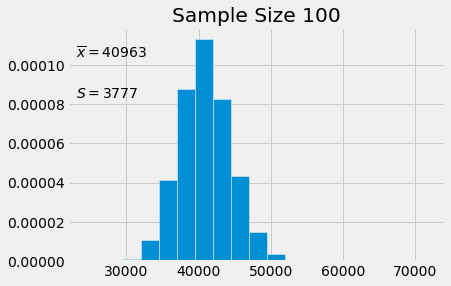

In [19]:
num_reps = 10000
means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size, num_reps)
plot_sample_means(means, sample_size, xlo, xhi)
# plt.xlim(50000, 100000);

What did you notice about the distributions of sample means in the four histograms above? Discuss with your neighbors. If you're unsure of your conclusion, ask your TA.

**Question 2.5.** Assign the variable `SD_of_sample_means` to the integer corresponding to your answer to the following question:

When I increase the number of resamples that I take, for a fixed sample size, the SD of my sample means will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary wildly


<!--
BEGIN QUESTION
name: q2_5
-->

In [20]:
SD_of_sample_means = ...

**Question 2.6.** Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Assign the variable `pop_vs_sample` to an array of integer(s) that correspond to true statement(s).

1. Sample SD gets smaller with increasing sample size.
2. Sample SD gets larger with increasing sample size.
3. Sample SD becomes more consistent with population SD with increasing sample size.
4. SD of sample means gets smaller with increasing sample size.
5. SD of sample means gets larger with increasing sample size.
6. SD of sample means stays the same with increasing sample size.

<!--
BEGIN QUESTION
name: q2_6
-->

In [21]:
pop_vs_sample = ...

Run the following six cells multiple times and examine how the sample SD and the SD of sample means change with sample size.

The first histogram is of the sample; the second histogram is the distribution of sample means with that particular sample size. Adjust the bins as necessary.

Text(0.5, 1.0, '10 Sampled Salaries')

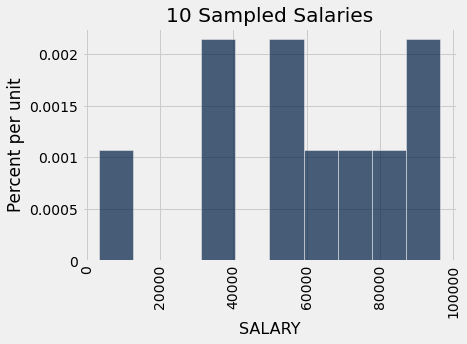

In [22]:
sample_size = 10
sample_10 = georgia_salaries.sample(sample_size)
sample_10.hist("SALARY")
plt.title('10 Sampled Salaries')
# print("Sample SD: ", np.std(sample_10.column("SALARY")))
# simulate_sample_mean(georgia_salaries, 'SALARY', 10, 1000)
# plt.xlim(5,120000);
# plt.ylim(0, .0001);
# plt.title('Distribution of sample means for sample size 10');



#### Distribution of Sample Means

Sample size:  10
Population mean: 40883
Min of sample means 7411
Average of sample means:  40809
Max of sample means 360000
Population SD: 37652
SD of sample means: 12096


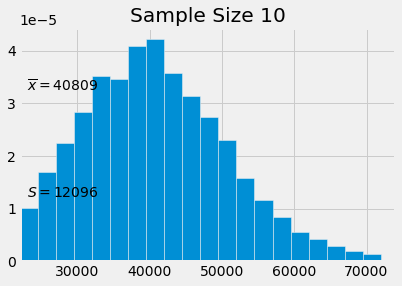

In [23]:
means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size, num_reps)
plot_sample_means(means, sample_size, xlo, xhi)

Text(0.5, 1.0, '200 Salaries')

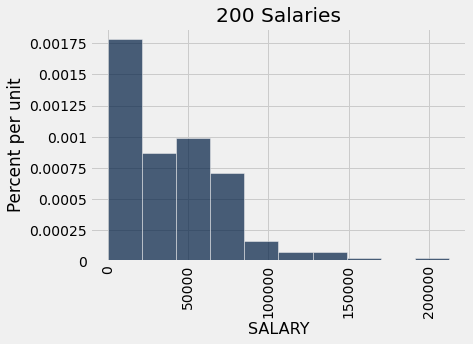

In [24]:
sample_size = 200
sample_200 = georgia_salaries.sample(sample_size)
sample_200.hist("SALARY")
plt.title('200 Salaries')


#### Distribution of Sample Means

Sample SD:  34606.449595536455
Sample size:  200
Population mean: 40883
Min of sample means 32372
Average of sample means:  40894
Max of sample means 78345
Population SD: 37652
SD of sample means: 2690


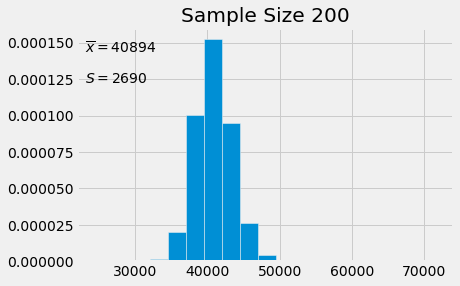

In [25]:
print("Sample SD: ", np.std(sample_200.column("SALARY")))
means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size, num_reps)
plot_sample_means(means, sample_size, xlo, xhi)
# plt.title('Distribution of sample means for sample size 200');

Text(0.5, 1.0, '1000 Salaries')

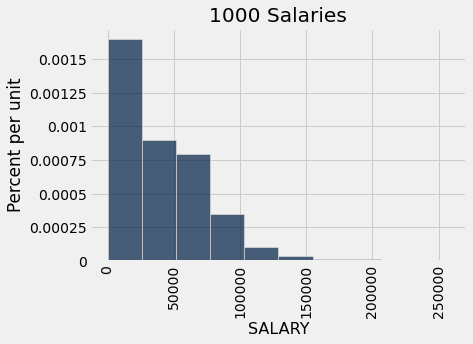

In [26]:
sample_size = 1000
sample_1000 = georgia_salaries.sample(1000)
sample_1000.hist("SALARY")
plt.title('1000 Salaries')




Sample SD:  34606.449595536455
Sample size:  1000
Population mean: 40883
Min of sample means 36780
Average of sample means:  40887
Max of sample means 50802
Population SD: 37652
SD of sample means: 1203


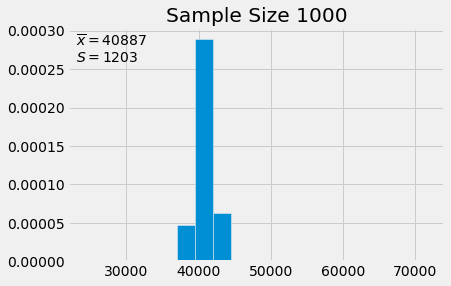

In [27]:
print("Sample SD: ", np.std(sample_200.column("SALARY")))
means, _lo, _hi = simulate_sample_mean(georgia_salaries, 'SALARY', sample_size, num_reps)
plot_sample_means(means, sample_size, xlo, xhi)

You should notice that the distribution of means gets narrower and spikier, and that the distribution of the sample increasingly looks like the distribution of the population as we get to larger sample sizes. 

Let's illustrate these trends. Below, you will see how the sample SD changes with respect to sample size (N). The blue line is the population SD.

The next cell shows how the SD of the sample means changes relative to the sample size (N).

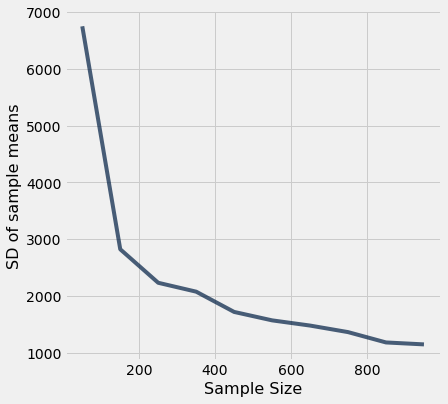

In [34]:
# Don't change this cell, just run it!
def sample_means(sample_size):
    means = make_array()
    for i in np.arange(1000):
        sample = georgia_salaries.sample(sample_size).column('SALARY')
        means = np.append(means, np.mean(sample))
    return np.std(means)

sample_mean_SDs = make_array()
for i in np.arange(50, 1000, 100):
    sample_mean_SDs = np.append(sample_mean_SDs, sample_means(i))
Table().with_columns("SD of sample means", sample_mean_SDs, "Sample Size", np.arange(50, 1000, 100))\
.plot("Sample Size", "SD of sample means")

From these two plots, we can see that the SD of our *sample* approaches the SD of our population as our sample size increases, but the SD of our *sample means* (in other words, the variability of the sample mean) decreases as our sample size increases.

**Question 2.7.** Is there a relationship between the sample size and the standard deviation of the sample mean? Assign `q2_7` to the number corresponding to the statement that answers this question.

1. The SD of the sample means is inversely proportional to the square root of sample size.
2. The SD of the sample means is directly proportional to the square root of sample size.

<!--
BEGIN QUESTION
name: q2_7
-->

In [ ]:
q2_7 = ...

Throughout this lab, we have been taking many random samples from a population. However, all of these principles hold for bootstrapped resamples from a single sample. If your original sample is relatively large, all of your re-samples will also be relatively large, and so the SD of resampled means will be relatively small. 

In order to change the variability of your sample mean, you’d have to change the size of the original sample from which you are taking bootstrapped resamples.